## Time value of money

### Naming

###### Units
* Money is measured in units of USD, CNY, EUR, etc.
* Time is measured in units of days, weeks, months or years.

Sometimes units are not written, so $\,T=1\,$ means one year, and $\,1\,$ unit of money means, for example, $\,1\,$ USD.

###### Names of time points and lengths
* Current values are often named with `spot`, for example the spot price of a stock is its price right now.
* The final time point of a contract is usually called the contract's `maturity`.
  * So the `time to maturity` of a contract is the amount of time from now until the contract's maturity.
* The length of a contract from its start to its end is usually called the `tenor` of the contract.
 

### Discount Factor and PV
You and me set up a contract that starts now and ends at $\,T\,$:
* Right now (at time $\,t=0)\,$ I give you a fixed amount of USD
* In return, at time $\,t=T\,$ you will pay me $\,1\,$ USD

<b>To make this a fair contract, how much should I give you now ?</b>

Let us denote by $\,P\,(\,T\,)\,$ the amount I should give you now. This number is called the Discount Factor in our contract.

Note that $\,P\,(\,0\,)=1\,$.

<b>What does this discount factor depend on ?</b>

* the currency $\,\rightarrow\,$ _for example, USD pays differently from CHF_
* the time span $\,T\,$ $\,\rightarrow\,$ _for example, $\,T=1\,$ is different from $\,T=5\,$_
* and many others, for example, you may not be able to pay me the agreed $\,1\,$ USD at $\,T\,$ <br/>this means the probability that you'll actually pay is somewhere between 0 and 1
 
<b>Present Value (PV)</b>

In our contract the Present Value (also called PV) of the $\,1\,$ USD you agree to pay me is the above mentioned $\,P\,$.

Usually, the probability that you will actually pay (and other similar risk items) are considered separately from $\,P\,$.

### Task: PV of a fixed leg

We agree that
* You will pay me 20 separate payments of $\,1\,$ USD at the end of years $\,1, 2, \dots, 20\,$ from now
* In return, you receive now a single payment.

If the yearly discount factor will always be $\,0.98\,$, then what current payment value makes this a fair contract ?

Help: What is the PV of a $\,1\,$ USD payment that you will pay me $\,n\,$ years from now ?

In [1]:
# This DY is the yearly Discount Factor. In the current task this DY is the same for every year.
DY = 0.98

# This PV is the amount that I give you now in return for your 20 separate payments of 1 USD at t = 1, 2, ... , 20
# <WRITE YOUR SOLUTION HERE>

###### Answer

In [2]:
DY = 0.98

import numpy as np
PV = np.sum([np.power(DY, 1.0 + y) for y in range(20)])
print('PV = {:.2f}'.format(PV))

PV = 16.29


## Simple rate and Forward rate

### Simple rate

#### Simple rate for 1 year

You and me set up a contract:
* Right now (at $\,t=0)\,$ I pay you $\,1\,$ USD
* In return, at $\,t=T\,$ you will pay me a fixed amount 

Let's denote by $\,1+L\,(\,t=1\,)\,$ the fixed amount that you will pay. Note that $\,L\,(\,t=1\,)=\displaystyle{\frac{1}{P\,(\,t=1\,)}-1}\,$.

This $\,L\,(\,t=1\,)\,$ is called the currently observed <b>simple rate</b> for one year.

#### Note: Compare governent bond rates

For $\,t=1\,$ a real-life quantity closely related to the USD simple rate is [displayed here](https://fred.stlouisfed.org/series/USD12MD156N). This is the interest that the US agreed to pay on its own 12-month loans at each indicated time point in the past.

To compare government bonds from differnet countries, have a look at current government bond rates at http://www.worldgovernmentbonds.com/.

#### Task: Rates

If a country must pay higher interest rates on its loans, then how does this affect the government's ability to support the country's own citizens and economy ?

###### Answer
The government will have less money to support the country itself.

#### Simple rate for T years

Let us allow <b>both integer and non-integer</b> values of $\,T\,$ , for example $\,T=2\,$ or $\,T=\displaystyle{\frac{1}{2}}\,$.

Again, you and me set up a contract:
* Right now (at $\,t=0)\,$ I pay you $\,1\,$ 
* In return, at $\,t=T\,$ you will pay me a fixed amount 

To make this a fair contract you will pay $\,1+ T \cdot L\,(\,T\,)\,$. Note that $\,L\,(\,T\,)=\displaystyle{\frac{1}{T} \cdot \left(\frac{1}{P\,(\,T\,)}\,-1\right)}$.

#### Task: Simple rate for T years
In our contract for $\,T\,$ years assume that there is a <b>constant yearly discount factor</b>, DY.

Using this DY what is the value of $\,L\,(\,T\,)$ ?

Help: you need to find the connection between $\,P\,(\,T\,)\,$, the constant yearly $\,$DY, and $\,T\,$.

In [3]:
# This DY is the yearly Discount Factor. In the current task this DY is the same in each year.
DY = 0.98

# Let T = 1, 2, 3, 4, 5.
# This L_T is the T-year yield of the given example.
# L_T = <WRITE YOUR SOLUTION FOR THIS CONSTANT DY AND EACH OF THE THREE T VALUES>

###### Answer
Use (1) the definition of the discount factor and (2) the definition of the simple rate.

In [4]:
DY = 0.98

import numpy as np
for T in range(1, 6):
    P = np.power(DY, T)
    L = 1/T * (1.0/P - 1.0)
    print('T = {}, L = {:.4f}'.format(T, L))

T = 1, L = 0.0204
T = 2, L = 0.0206
T = 3, L = 0.0208
T = 4, L = 0.0210
T = 5, L = 0.0213


### Forward rate

Let us move the starting point of the contract into the future, to a $\,t>0\,$ time point.

* At that selected time point in the future (at $\,t>0)\,$ I will pay you $\,1\,$
* In return, at $\,T>t\,$ you will pay the fixed amount $\,1+\left(T-t\right) \cdot F\,(\,0,\,t,\,T\,)\,$

Here $\,F\,(\,0,\,t,\,T\,)\,$ is called the <b>forward rate</b>. It is our current knowledge of the simple rate from $\,t\,$ to $\,T\,$. 

The first argument is often omitted when it is $\,0\,$. So we simply write $\,F\,(\,t,\,T\,)\,$ and, accordingly, $\,\displaystyle{P\,(\,t,\,T\,)=\frac{1}{1+(T-t) \cdot F(t,T)}}\,$.

#### Task: Forward rate
If the 5-year and 10-year discount factors are $\,P(5)=0.8\,$ and $\,P(10)=0.5\,$, then what is $\,F(5,10)\,$?

###### Answer
From the definition of the discount factor: $\,P\left(0,\,10\right)=P\left(0,\,5\right) \cdot P\left(5,\,10\right)\,$.

From the definition of the forward rate: $\,\displaystyle{F\left(5, 10\right) = \frac{1}{10-5} \cdot \left(\frac{1}{P\left(5, 10\right)} -1 \right)}\,$.

Combining the above two gives $\,\displaystyle{F\left(5, 10\right) = \frac{1}{5} \cdot \left(\frac{P\left(0,\,5\right)}{P\left(0, 10\right)} -1 \right)=\frac{1}{40}=0.025\,}$.

## Rates for short times

### Instantaneous spot rate (Short rate)

You and me set up a contract:
* Right now (at $\,t=0)\,$ I pay you $\,1\,$ 
* In return, at $\,T\ll 1\,$ you will pay me $\,1+ T \cdot L\,(\,T\,)\,$

The <b>instantaneous spot rate</b>, $\,r\,$, is the limiting value of the simple rate: 

$\,\displaystyle{r = \lim_{T\,\to\,0}L\,(\,T\,)=\lim_{T\,\to\,0}\left(\frac{\frac{1}{P\,(\,T\,)}-1}{T}\right) = \lim_{T\,\to\,0}\left(\frac{-\,1}{P\,(\,T\,)}\cdot\frac{P\,(\,T\,)-P\,(\,0\,)}{T}\right)=-\,\frac{\partial}{\partial\,T}\Bigg|_{\,T\,=\,0}\!\!\ln\big(P\,(\,T\,)\big)}$.

Note: instantaneous means that the time difference is very short (goes to zero), and spot (in "spot rate") means that $\,t=0\,$.

### Instantaneous forward rate

Again, let us move the starting point of the contract into the future, to a $\,t>0\,$ time point.

You and me set up a contract:

* At a selected time point in the future (at $\,t>0)\,$ I will pay you $\,1\,$
* In return, a very short time later (at $\,T)\,$ you will pay me $\,1+\left(T-t\right) \cdot F\,(\,t,\,T\,)$

For a very short $\,T\,$ this simple rate becomes the <b>instantaneous forward rate</b>:

$\,\displaystyle{f\left(\,t\,\right) = \lim_{T\,\to\,t}F\,(\,t,\,T\,)=-\,\frac{\partial}{\partial\,T}\Bigg|_{\,T\,=\,t}\!\!\ln\big(P\,(\,t,\,T\,)\big)}$.

Note that the instantaneous spot rate is the $\,t=0\,$ special case: $\,r=f\left(\,0\,\right)\,$.

### Integral form of the Discount Factor
Integrating the definition of the instantaneous forward rate gives ${\displaystyle P\,(\,t,\,T\,)=\exp\left(-\int_t^T \!\!f(\tau)\,d\tau\right)}\,$.

#### Task: Instantaneous rates
The instantaneous rate, $\,f(t)\,$, is currently 1\% and it grows linearly by 0.2\% per year.

What is the 1Y $\rightarrow$ 11Y forward rate ? 

Help: With the provided $\,f(t)\,$ you need to calculate $\,F\,(\,1,\,11\,)\,$ from $\,P\,(\,1,\,11\,)\,$. 

###### Answer
From the definition of the forward rate: $\,\displaystyle{F\left(1, 11\right) = \frac{1}{11-1} \cdot \left(\frac{1}{P\left(1, 11\right)} -1 \right)}\,$.

From the definition of the instantaneous forward rate: $\,\displaystyle{P\,(\,1,\,11\,)=\exp\left(-\int_1^{11} \!\! (0.01 + 0.002\tau)\,d\tau\,\right)=\exp\big(-\left(0.1+0.12\right)\,\big)}$.

Combining the above two gives $\,\displaystyle{F\left(1, 11\right) = \frac{\exp\,(\,0.22\,)-1}{10}}\approx 2.46\%\,$.

In [5]:
import numpy as np
F_1_11 = (np.exp(0.22)-1.0) / 10.0
print('F_1_11 = {:.3f}%'.format(F_1_11 * 100))

F_1_11 = 2.461%


## Compounded interest
### Discrete Compounding

You and me set up two contracts:

* First contract
 * right now (at $\,t=0)\,$ I pay you $\,1\,$ 
 * at $\,t=1\,{\mathit /}\,2\,$ you pay me the invested $\,1\,$ amount with interest: $\,1+\,L(1\,{\mathit /}\,2)\,{\mathit /}\,2\,$
* Second contract
 * at $\,t=1\,{\mathit /}\,2\,$ I pay back to you the same amount: $\,1+\,L(1\,{\mathit /}\,2)\,{\mathit /}\,2\,$ 
 * at $\,t=1\,$ you pay me the invested amount with interest: $\,\big(1+\,L(1\,{\mathit /}\,2)\,{\mathit /}\,2\big) \cdot \big(1+\,F(1\,{\mathit /}\,2, 1\,{\mathit /}\,2)\,{\mathit /}\,2\big)\,$
 
The final sum I receive back at $\,t=1\,$ must be the same as in the simple 1-year contract that does not have the above 2-step compounding.

In other words, these three rates are connected:
$\,\displaystyle{1+L(1)=\left(1+\frac{L\left(\frac{1}{2}\right)}{2}\right) \cdot \left(1+\frac{F\left(\frac{1}{2}, \frac{1}{2}\right)}{2}\right)}\,$.

Moreover, if we assume that $\,L\left(\frac{1}{2}\right)=F\left(\frac{1}{2}, \frac{1}{2}\right)\,$, then we have $\,\displaystyle{1+L(1)=\,\left(1+\frac{1}{2}\,L\!\left(\frac{1}{2}\right)\right)^{2}}\,$\.

#### Naming conventions for discrete compounding
If we use discrete compounding with $\,n\,$ steps per year, then $\,n\cdot L\!\left(\frac{1}{n}\right)\,$ is called the yearly rate.<br/>
Here $\,n\,$ is called the compounding frequency.<br/>


For example, if you and me agree on a rate of $\,4\%\,$ with quarterly compounding,<br/>
then your deposit will grow by $\,1\%\,$ at the end of each quarter.

#### Task: Deposit with discrete compounding
Your 5-year deposit of $\,N=100$k HUF receives $\,r=4\%\,$ with either annual ($n=1$) or semi-annual ($n=2$) compounding.

* If the compounding frequency is $\,n=1$, then how much will you have at $\,T=3\,$ ? How much with $\,n=2\,$ ?
* In these two cases what is the equivalent simple rate ?

###### Answer
You will have $\,\displaystyle{N\cdot\left(1+\frac{r}{n}\right)^{n\,T}}\,$. 
The equivalent simple rate is $\,\displaystyle{ L\,(\,T\,)=\frac{1}{T} \cdot \left[\,\left(1+\frac{r}{n}\right)^{n\,T}-1\,\right]}\,$.

Please see below for the calculated amounts.

In [6]:
N = 1.0e+5
r = 0.04
T = 5
print('Compounding frequency, Final amount, Equivalent simple rate')
for n in [1, 2]:  # compounding frequency
    multiplier = (1 + r/n) ** (n * T)
    final_amount = N * multiplier
    L = (multiplier - 1.0) / T
    print('{}, {:.2f}, {:.2f}%'.format(n, final_amount, L * 100.0))

Compounding frequency, Final amount, Equivalent simple rate
1, 121665.29, 4.33%
2, 121899.44, 4.38%


### Continuous Compounding

If the forward rate is the same on each time interval, then we have $\,\displaystyle{1+L(1)=\,\left(1+\frac{1}{n}\,L\!\left(\frac{1}{n}\right)\right)^{n}}\,$ for $\,n=3, 4, \dots\,$.

According to the definitions of the instantaneous rates: $\,\displaystyle{\lim_{n\,\to\,\infty}L\!\left(\frac{1}{n}\right)}=f(0)\,$,

therefore, $\,\displaystyle{1+L(1)=\left(1+\frac{f(0)}{n}\right)^n}\,$ converges to $\,e^{\,f(0)}\,$ as $\,n\to\infty\,$. 

In other words, 
* if the instantaneous <b>rate is constant $\,f(0)\,$</b> over time, then the simple rate is $\,\displaystyle{L\,(\,0,\,T\,)=\frac{e^{\,f(0)\,T}-1}{T}}\,$,
* if the instantaneous <b>rate changes</b>, then
$\,\displaystyle{L\,(\,0,\,T\,)=\frac{\exp\left(\int_0^T \!\!f(\tau)\,d\tau\right)-1}{T}}\,$.

#### Task: Deposit with continuous compounding
On a different 5-year deposit of $\,N=100$k HUF you receive a yearly $\,r=4\%\,$ with continuous compounding.<br/>
* How much will you have on this deposit by the end of the third year ?
* What is the equivalent simple rate ?

###### Answer
You will have $\,N\cdot \exp\,\left(\,r\,T\,\right)\,$, and 
the equivalent simple rate is $\,\displaystyle{ L\,(\,T\,)=\frac{\exp\,\left(\,r\,T\,\right)-1}{T}}\,$.

From this result note that the continously compounded rate can be expressed as
$\,\displaystyle{r=\frac{1}{T}\,\log\Big(1+T\cdot L\,(\,T\,)\,\Big)}\,$.

In [7]:
import numpy as np
N = 1.0e+5
r = 0.04
T = 5
multiplier = np.exp(r * T)
final = N * multiplier
L = (multiplier - 1) / T
print('Final amount, Equivalent simple rate')
print('{:.2f}, {:.2f}%'.format(final_amount, L * 100.0))

Final amount, Equivalent simple rate
121899.44, 4.43%


## Yield curve

###### Yield on an investment, also called Yield, also called Return
The yield on an investment is the total earnings divided by the capital. It is usually expressed as a percent value.

For example, a stock is purchased for $\,S_{\,0}=100\,$, later it pays a dividend of $\,2\,$, and finally it is sold for $\,S_{\,T}=104\,$. 
<br/>
In this case the yield on the investment is $\,(\,4+2\,)\,\,{\mathit /}\,\,100=6\%\,$.

###### Annualized percent yield, also called Annualized percentage rate

The annualized percent yield of an investment is the annually compounded rate producing the yield of the investment.

For example, a stock is purchased for $\,S_{\,0}=100\,$, and it is sold at $\,T=2\,$ for $\,S_{\,T}=121\,$.
<br/>
In this case the annualized percent yield is $\,0.1=10\%\,$, because $\,S_{\,0}\cdot\,\left(\,1 + 0.1\,\right)^{\,2}=S_{\,T}\,$.

Another example is an account that pays $\,0.5\%\,$ per month.
<br/>
The annualized percent yield of this account is $\,\left(\,1+0.005\,\right)^{\,12}-1=6.18\%\,$.

###### Market convention for Yield curves

Often instead of the annualized percent yield the equivalent semi-annually compounded rate is quoted.

For example, if the annualized percent yield is $\,\mathrm{APY}=8.16\%\,$, then the quoted rate is $\,Y=8\%\,$.
<br/>
Explanation: use the $\,\left(\,1 + Y\,{\mathit /}\,n\,\right)^{\,n}\,$ discrete compounding formula with $\,n=2\,$ and observe that $\,\left(\,1 + Y\,{\mathit /}\,2\,\right)^{\,2}=1+\mathrm{APY}\,$.

Please see this example also in the answer to the question "Are the CMT yields annual yields?" at<br/>
https://home.treasury.gov/policy-issues/financing-the-government/interest-rate-statistics/interest-rates-frequently-asked-questions

### Task: Yield curve of June 2019 vs June 2020
Find two data series and plot them together: (1) the USD yield curve in June 2020 (2) the same yield curve 1Y earlier.

###### Answer

_Download the data_

1. In the current folder (directory) please create the `data` subfolder .
2. Go to https://www.treasury.gov/resource-center/data-chart-center/interest-rates/Pages/TextView.aspx?data=yield
3. In the "Select type of Interest Rate Data" menu select "Daily Treasury Yield Curve Rates" and then click "GO".
4. In the "Select Time Period: menu select the current month and then click "GO".
5. Click on the orange colored XML icon above and observe the structure of the received URL: 
<small>https:<span></span>//data.treasury.gov/feed.svc/DailyTreasuryYieldCurveRateData?$filter=<font style='color:red;font-weight:bold;background-color:yellow;'>month</font>(NEW_DATE)%20eq%20<font style='color:red;font-weight:bold;background-color:yellow;'>10</font>%20and%20<font style='color:red;font-weight:bold;background-color:yellow;'>year</font>(NEW_DATE)%20eq%20<font style='color:red;font-weight:bold;background-color:yellow;'>2020</font></small>

6. Insert 2020 for the year and 06 for the month, and save the downloaded file in `data` as  `Y_USD_2020_6.xml`.
7. Replace the year 2020 by 2019, and save `Y_USD_2019_6.xml` also to the `data` subfolder.

_Read and convert the data_

In [8]:
import xml.etree.ElementTree as ET
import re
import os


def tenor_str_to_months(tenor_str):
    """Convert string formatted month or year to number of months"""
    m = re.search('^(\d+)(MONTH|YEAR)$', tenor_str)
    if m:
        return int(m.group(1)) * (1 if m.group(2) == 'MONTH' else 12)
    else:
        raise Error('Cannot convert this date string to number of months: {}'.format(tenor_str))

        
def yield_curve_on_date(xml_file, requested_date):
    """Read yield curve data from treasury.gov's xml"""
    y = dict()
    
    for entry in ET.parse(xml_file).getroot().findall('{http://www.w3.org/2005/Atom}entry'):
        for content in entry.findall('{http://www.w3.org/2005/Atom}content'):
            date = None
            for properties in content:
                for d in properties:
                    if 'NEW_DATE' in d.tag:
                        date = d.text
                    elif 'BC_' in d.tag and 'DISPLAY' not in d.tag:
                        tenor = tenor_str_to_months(d.tag.split('_')[-1])
                        y[tenor] = float(d.text)
        if date and requested_date in date:
            return y

    return None


# Read the two yield curves
y_2019_06_03 = yield_curve_on_date(os.path.join('data', 'Y_USD_2019_6.xml'), '2019-06-03')
y_2020_06_01 = yield_curve_on_date(os.path.join('data', 'Y_USD_2020_6.xml'), '2020-06-01')

_Plot yield curves_

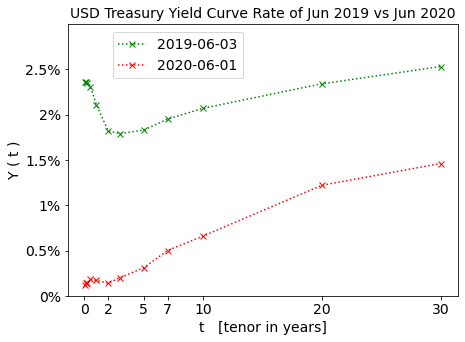

In [9]:
import matplotlib.pyplot as plt

fontsize = 14  # font size for the text of the current plot
xticks = [0, 24, 60, 84, 120, 240, 360]
yticks = [0, 0.5, 1, 1.5, 2, 2.5]
ylim = [0, 3]

plt.plot(*zip(*sorted(y_2019_06_03.items())), 'gx:', markersize=6, label='2019-06-03')
plt.plot(*zip(*sorted(y_2020_06_01.items())), 'rx:', markersize=6, label='2020-06-01')
plt.title('USD Treasury Yield Curve Rate of Jun 2019 vs Jun 2020', fontsize=fontsize)
plt.xlabel('t   [tenor in years]', fontsize=fontsize)
plt.ylabel('Y ( t )', fontsize=fontsize)
ax = plt.gca()
ax.set_xticks(xticks)
ax.set_xticklabels([str(int(tenor_measured_in_months/12)) for tenor_measured_in_months in xticks], fontsize=fontsize)
ax.set_yticks(yticks)
ax.set_yticklabels([str(y)+'%' for y in yticks], fontsize=fontsize)
ax.set_ylim(ylim)
plt.legend(bbox_to_anchor=(0.45, 0.97), loc=1, borderaxespad=0., fontsize=fontsize)

fig = plt.gcf()
fig.set_size_inches([7, 5])
plt.show()

### Risk-free rate and Discounting
#### Risk-free investment (free of credit risk)

If you set up a contract, there is always a non-zero chance that something unexpected will happen.<br/>
The safest USD financial instruments are short-term US Treasury Bills, they are the least likely to have something unexpected.<br/>

Currently, short-term US T-Bills are the closest approximations of a risk-free investment,<br/>
because the US Treasury is very-very likely to fulfill its payment obligations in the near future.

#### Risk-free rate
The theoretical concept of a `risk-free rate` is the rate of a risk-free investment.<br/>
Note, however, that the actual value of the risk-free rate may change tomorrow. This is called interest rate risk.

For example, you can enter a `risk-free` contract between now and time $\,T=3\,$ with an annualized percent yield of $\,\mathrm{APY}=2\%\,$.
<br/>
This risk-free contract will be a reference for all other contracts with the same tenor.


#### Discounting
Moreover, assume that at $\,T=3\,$ you will receive the amount of $\,100\,$.
<br/>
With the risk-free $\,\mathrm{APY}=2\%\,$ this $\,100\,$ received at $\,T=3\,$ 
has the following normalized value to you: $\,\displaystyle{\frac{100}{\left(\,1+\mathrm{APY}\,\right)^{\,3}}}\,$.  


The normalization with the risk-free rate is called `discounting with the risk-free rate`.<br/>

#### Task: PV of your future payments

1. You and a bank just signed a contract. For the next 30 years at the end of each month you will pay $\,m=1$ USD.
2. Select one of the above USD yield curves.
3. Between 1 month and 360 months calculate each missing value with linear interpolation.
4. Convert each yield to APY.
5. Calculate the sum of the PVs of your payments.
6. Repeat the calculation with the other yield curve.
7. What do you think?

###### Answer

_Helper functions: Linear interpolation, Discount factor, PV calculation_

In [10]:
import numpy as np
from numbers import Number

INTP_MAX_STEP_NUMBER = 10000
INTP_MIN_STEP_SIZE = 1.0e-6
NUMBER_OF_MONTHLY_PAYMENTS = 360


def interpolate_linear(xy_dict={}, x_from=None, x_to=None, x_step=None):
    """
    Linear interpolation of y(x) values at the x points  ( x_from, x_from + x_step,  x_from + 2 * x_step, ... )
    based on y values at the nearest available x values. 

    The x value of the last interpolation is strictly smaller than x_to, equality is not allowed.

    Available x, y pairs are listed in xy_dict.

    The returned dict contains only the interploated values.
    """
    xy_intp = dict()
    
    # --- testing inputs ---
    assert len(xy_dict.keys()) > 1, 'Interpolation needs at least two points'
    assert x_from is not None, 'Missing argument: x_from'
    assert x_to is not None, 'Missing argument: x_to'
    assert x_step is not None, 'Missing argument: x_step'

    assert all([isinstance(x, Number) for x in xy_dict.keys()]), 'All listed x values have to be numeric'
    assert all([isinstance(y, Number) for y in xy_dict.values()]), 'All listed y values have to be numeric'
    assert isinstance(x_from, Number), 'x_from has to be numeric'
    assert isinstance(x_to, Number), 'x_to has to be numeric'
    assert isinstance(x_step, Number), 'x_step has to be numeric'
    
    x_list, y_list = zip(*sorted(xy_dict.items()))
    x_intp = np.arange(x_from, x_to, x_step)  # x values of the interpolated points, np.arange allows float step
    
    assert x_list[0] <= x_intp[0], 'The x value of the first interpolated y must be >= the first available x value'
    assert x_intp[-1] <= x_list[-1], 'The x value of the last interpolated y must be <= the last available x value'
    assert x_step > 0.0, 'The step size between the x values of the interpolated points must be positive'
    assert x_intp[0] + x_step <= x_list[-1], 'Second x value of the interpolation must be <= the last available x value'

    assert (x_list[-1] - x_list[0]) / x_step <= INTP_MAX_STEP_NUMBER, \
        'The maximum number of interpolation steps is {}'.format(INTP_MAX_STEP_NUMBER)
    assert all([x_list[i] - x_list[i - 1] >= INTP_MIN_STEP_SIZE for i in range(1, len(x_list))]), \
        'The distance between neighboring listed x values has to be at least {}'.format(INTP_MIN_STEP_SIZE)
    
    # --- interpolation --- 
    i_intp = 0  # i_list and i_intp are the indexes of the known and requested x values
    i_list = 0
    while i_intp < len(x_intp) and i_list < len(x_list):
        # linear interpolation at x_intp[i_intp] based on nearest available known values
        r = (x_intp[i_intp] - x_list[i_list]) / (x_list[i_list + 1] - x_list[i_list])
        xy_intp[x_intp[i_intp]] = r * y_list[i_list + 1] + (1.0 - r) * y_list[i_list]
        
        # move to the next interpolated point such that x_list[i_list] <= x_intp[i_intp] < x_list[i_list + 1]
        # note that the second comparison is a sharp < relation, in other words, equality is not allowed
        i_intp += 1
        if i_intp < len(x_intp):            
            while x_list[i_list + 1] <= x_intp[i_intp]:
                i_list += 1

    return xy_intp


def quoted_percent_yield_to_discount_factor(quoted_percent_yield=None, tenor_in_years=None):
    annual_percent_yield = 100.0 * ( (1.0 + 0.5 * quoted_percent_yield / 100.0) ** 2.0 - 1.0 )
    continuous_rate = np.log(1.0 + tenor_in_years * annual_percent_yield / 100.0) / tenor_in_years
    discount_factor = np.exp(-1.0 * continuous_rate * tenor_in_years)
    
    return discount_factor
    

def calculate_pv(yield_curve_months=None, fixed_payment_amount=None):
    pv = 0.0
    y_intp = interpolate_linear(xy_dict=yield_curve_months, x_from=1, x_to=NUMBER_OF_MONTHLY_PAYMENTS, x_step=1)
    for tenor_in_months, quoted_percent_yield in y_intp.items():
        tenor_in_years = tenor_in_months / 12.0 
        discount_factor = quoted_percent_yield_to_discount_factor(quoted_percent_yield=quoted_percent_yield, 
                                                                  tenor_in_years=tenor_in_years)
        pv += fixed_payment_amount * discount_factor            

    return pv

_Calculate PVs_

Note the significant difference between the two PVs: $\,273.61\,$ vs $\,311.29\,$

What is the reason for this difference ? Can you explain ?

In [11]:
FIXED_PAYMENT_AMOUNT = 1


for start_time, yield_curve_months in zip(['2019-06-03', '2020-06-01'], [y_2019_06_03, y_2020_06_01]):
    pv = calculate_pv(yield_curve_months=yield_curve_months, fixed_payment_amount=FIXED_PAYMENT_AMOUNT)
    print('Start time: {}, Fixed monthly payment amount: {}, Number of monthly payments: {}. PV: {}'
          .format(start_time, FIXED_PAYMENT_AMOUNT, NUMBER_OF_MONTHLY_PAYMENTS, round(pv, 2)))

Start time: 2019-06-03, Fixed monthly payment amount: 1, Number of monthly payments: 360. PV: 273.61
Start time: 2020-06-01, Fixed monthly payment amount: 1, Number of monthly payments: 360. PV: 311.29


## Volatility and Daily log return

### Volatility
In finance, the standard deviation (of a time series) is usually called volatility.

If the time window is not explicitly mentioned, then it is usually one year (for example, with derivatives) or one day (for example, with daily risk).

#### Task: In each month between 2011 and 2013 how much was the volatility of the daily average temperature of Budapest ?

###### Answer

_Download data_

Download the daily average temperatures of Budapest from 1901 to the current year.
1. Please go to https://www.met.hu/eghajlat/magyarorszag_eghajlata/eghajlati_adatsorok/Budapest/adatok/napi_adatok/index.php
2. On the right, below "Adatok", click on "Adatok letöltése". This will download the file "eghajlati_adatsor_1901-2019+Budapest.zip".
3. From this zip extract the file `BP_d.txt`, and move this file to the `data` subfolder of directory of the current notebook. 
4. Observe that the daily average temperature (Celsius) values are in the column "d_ta".

_Read and format the data_

In [14]:
import pandas as pd
from os import path

df = pd.read_csv(path.join('data', 'BP_d.txt'), sep=';')[['#datum', 'd_ta']]
df.rename(columns={'#datum': 'Date', 'd_ta': 'Avg temp'}, inplace=True)
df.index = pd.to_datetime(df['Date'])
df['Year'] = [date.year for date in df.index]
df['Month'] = [date.month for date in df.index]
df.drop(columns=['Date'], inplace=True)
df.head()

,Avg temp,Year,Month
Date,,,
1901-01-01,-5.7,1901,1
1901-01-02,-9.3,1901,1
1901-01-03,-9.1,1901,1
1901-01-04,-11.0,1901,1
1901-01-05,-11.1,1901,1


_Calculate the volatility for each month_

In [15]:
import numpy as np

FIRST_YEAR = 1901

years_months = np.unique(12 * (df.Year - FIRST_YEAR) + df.Month - 1)

year_month_vol = {ym: {'vol': np.std(df[(df.Year - FIRST_YEAR == ym // 12) & (df.Month - 1 == ym % 12)]['Avg temp']),
                       'year': ym // 12 + FIRST_YEAR, 
                       'month': ym % 12 + 1}
                  for ym in years_months}

_Plot results_

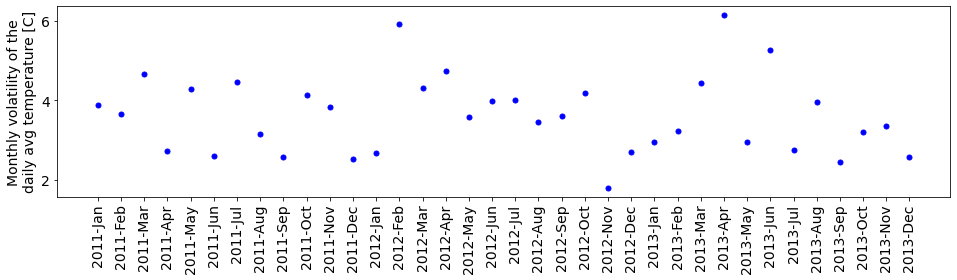

In [16]:
import numpy as np
import matplotlib.pyplot as plt
import calendar


PLOT_START_YEAR, PLOT_END_YEAR = (2011, 2013)

vol = {ym: year_month_vol[ym] for ym in year_month_vol.keys() 
           if PLOT_START_YEAR <= year_month_vol[ym]['year'] <= PLOT_END_YEAR}

my_fontsize = 14
yticks = [2, 4, 6]
xticks = np.arange( ( PLOT_START_YEAR - FIRST_YEAR ) * 12, ( PLOT_END_YEAR - FIRST_YEAR ) * 12 + 12 )
xticks_str = [str(year_month // 12 + FIRST_YEAR) + '-' + str(calendar.month_abbr[year_month % 12 + 1]) 
              for year_month in xticks]

plt.plot(sorted(vol.keys()), [vol[k]['vol'] for k in sorted(vol.keys())], 'b.', ms=10)
plt.ylabel("Monthly volatility of the\ndaily avg temperature [C]", fontsize=my_fontsize)
plt.yticks(yticks, [str(_) for _ in yticks], fontsize=my_fontsize)
plt.xticks(xticks, xticks_str, rotation='vertical', fontsize=my_fontsize)

fig = plt.gcf()
fig.set_size_inches([16, 3.5])
plt.show()

### Daily log return

At the closing of day $\,t\,$ the value of one unit of an asset is $\,S\,(\,t\,)\,$. 

This asset can be, for example, oil, the S&P500 stock index, or T-Bills.

For one unit of this asset, at the end of day $\,t\,$
the daily logarithmic return is $\,\displaystyle{R\left(\,t\,\right)=\log\left(\frac{S\,(\,t\,)}{S\,(\,t-1\,)}\,\right)}\,$

#### Task: What were the highest and lowest daily log return values of the S&P 500 index ?

###### Answer

_Download the data_

Download historical values of the SP500 index
1. Go to https://finance.yahoo.com/quote/%5EGSPC/history
2. For the Time period, select "Max".
3. On the right side, click "Apply", and below that "Download".
4. Save the downloaded file as `SP500.csv` in the `data` subfolder of the directory of the current notebook.

_Analyze the data_

In [17]:
import pandas as pd
import numpy as np
import os

# Read and format the data
df = pd.read_csv(os.path.join('data', 'SP500.csv'))[['Date', 'Close']]
df.index = pd.to_datetime(df['Date'])
df.drop(columns=['Date'], inplace=True)

# Calculate daily log return
df['R'] = np.log(df.Close) - np.log(df.Close.shift())
df.dropna(inplace=True)

# Show highest and lowest daily log returns. For formatted printing a DataFrame is applied.
pd.DataFrame(data=df.R.sort_values(ascending=False))

,R
Date,
1933-03-15,0.153661
1929-10-30,0.118055
1931-10-06,0.116522
1939-09-05,0.112064
1932-09-21,0.111640
...,...
1935-04-16,-0.104995
1929-10-29,-0.107121
2020-03-16,-0.127652


### Volatility of the daily log return
The volatility is the standard deviation.

In finance it is usually calculated either for one year or for one day.

#### Task: How much was the volatility of the daily log return of the S&P500 index in each year so far ?

###### Answer
Use the `df['R']` column calculated for the previous answer.

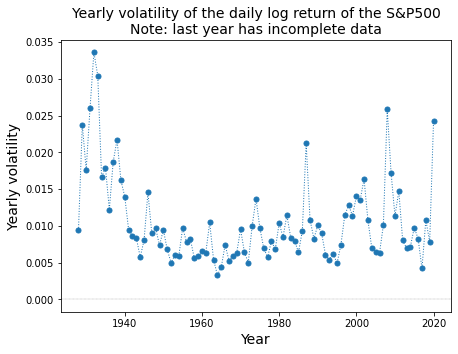

,Volatility
Year,
1932,0.033588
1933,0.030416
1931,0.025983
2008,0.025840
2020,0.024299
...,...
1952,0.004978
1995,0.004913
1965,0.004374


In [18]:
# Calculate yearly std.dev of the daily log return (R)
df['Year'] = [date.year for date in df.index]
sigma = df.R.groupby(df.Year).agg(np.std)

# Plot result
fontsize = 14
fig, axes = plt.subplots(figsize=(7,5))
plt.plot(sigma, markersize=10, marker='.', linestyle=':', linewidth=1)
plt.title("Yearly volatility of the daily log return of the S&P500\nNote: last year has incomplete data", fontsize=fontsize)
plt.xlabel('Year', fontsize=fontsize)
plt.ylabel('Yearly volatility', fontsize=fontsize)
plt.axhline(0, c='k', ls=':', lw=.3)
plt.show()

# Use DataFrame for the formatted printing of the sorted data
pd.DataFrame(data=sigma.rename('Volatility', inplace=True).sort_values(ascending=False))

## Recommended

* Short rate - https://en.wikipedia.org/wiki/Short-rate_model#The_short_rate
* Compounding - https://en.wikipedia.org/wiki/Compound_interest